### Ejercicio 11: Refinería

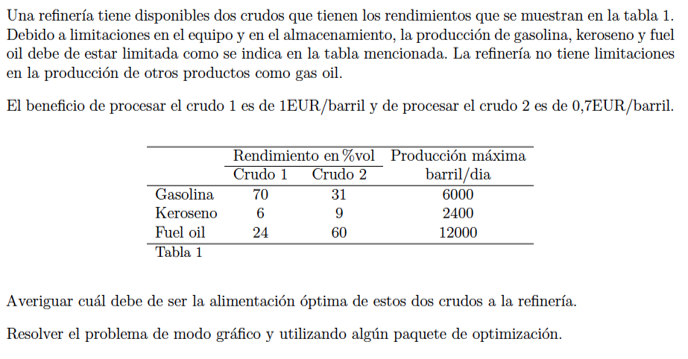

In [1]:
from IPython.display import Image 
Image(filename='img_enun/E11.png')

#### Planteamos el problema como un problema de LP

$$
\begin{align}
	&\text{max }  && V_1+0.7V_2 &&\\
	&\text{s.t. }  && \\
	&\text{Gasolina }  && 0.7V_1+0.31V_2 \le  6000\\
    &\text{Keroseno }  && 0.06V_1+0.09V_2 \le 2400 \\
    &\text{Fuel oil } && 0.24V_1+0.6V_2 \le 12000 \\
    & && V_1,V_2 \geq  0  \\
\end{align}
$$

#### Importamos Pyomo

In [2]:
from pyomo.environ import *

#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [3]:
model = ConcreteModel()

#### Definimos las variables como no negativas

In [4]:
model.V1 = Var(domain=NonNegativeReals)
model.V2 = Var(domain=NonNegativeReals)

#### Definimos la función objetivo

In [5]:
model.profit = Objective(expr = 1*model.V1 + 0.7*model.V2, sense=maximize)

#### Definimos la restricciones

In [6]:
model.Gasolina = Constraint(expr = 0.7*model.V1+0.31*model.V2 <= 6000)
model.Keroseno= Constraint(expr = 0.06*model.V1+0.09*model.V2 <= 2400)
model.FuelOil = Constraint(expr = 0.24*model.V1+0.6*model.V2 <= 12000)

In [7]:
model.dual = Suffix(direction=Suffix.IMPORT_EXPORT)
model.rc = Suffix(direction=Suffix.IMPORT_EXPORT)

results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()

  
print("Restricción \t valor \t lslack\tuslack \t dual")
for c in [model.Gasolina, model.Keroseno,model.FuelOil ]:
    print(c , " \t {0:4.0f} \t {1:4.1f} \t {2:4.1f} \t {3:4.1f}".format(c(), c.lslack(), c.uslack(), model.dual[c]))


2 Var Declarations
    V1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False : False : NonNegativeReals
    V2 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 19354.8387096774 :  None : False : False : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : V1 + 0.7*V2

3 Constraint Declarations
    FuelOil : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper   : Active
        None :  -Inf : 0.24*V1 + 0.6*V2 : 12000.0 :   True
    Gasolina : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper  : Active
        None :  -Inf : 0.7*V1 + 0.31*V2 : 6000.0 :   True
    Keroseno : Size=1, Index=None, Active=True
        Key  : Lower : Body              : Upper  : Active
        Non

In [8]:
model.rc.pprint()
model.dual.pprint()

rc : Direction=Suffix.IMPORT_EXPORT, Datatype=Suffix.FLOAT
    Key : Value
     V1 : -0.580645161290323
     V2 :                0.0
dual : Direction=Suffix.IMPORT_EXPORT, Datatype=Suffix.FLOAT
    Key      : Value
     FuelOil :              0.0
    Gasolina : 2.25806451612903
    Keroseno :              0.0
